# Applied Statistics - Assessment Problems
***

<style>
div.text_cell_render .MathJax_Display {
    text-align: center !important;
}
</style>

**_In the following code, the libraries required for all problems in this notebook are imported._**

In [ ]:
# Importing the required libraries.

# Mathematical functions from the standard library
import math 
# Permutations and combinations.
import itertools
# Random selection.
import random
# Numerical structures and operations.
import numpy as np 
# Plotting.
import matplotlib.pyplot as plt 
import seaborn as sns
# Working with statistics.
import scipy.stats as stats
# Working with normal distribution (Gaussian)
from scipy.stats import norm
# Working with dataframes.
import pandas as pd 

## Problem 1: Extending the Lady Tasting Tea

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using ```numpy``` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

***
_Libraries used in Problem 1:_
* math – Provides mathematical functions [Official documentation](https://docs.python.org/3/library/math.html)
- numpy (imported as np) – Supports numerical computations and array operations [Official documentation](https://numpy.org/doc/stable/)
- random – Used for generating random values [Official documentation](https://docs.python.org/3/library/random.html)
- matplotlib.pyplot (imported as plt) – Used for creating visualizations and plots [Official documentation](https://matplotlib.org/stable/api/pyplot_summary.html)
- itertools – Provides tools for efficient iteration and combinatorial operations [Official documentation](https://docs.python.org/3/library/itertools.html)
***

### Background: The Original Lady Tasting Tea

In Fisher’s classic experiment:
- Total cups: 8  
- 4 cups poured **tea first**
- 4 cups poured **milk first**

The lady claimed she could correctly identify which was which.

### Simulation Setup: Extended Experiment

We now have:
- **12 cups total**
- **8 tea-first**
- **4 milk-first**

We’ll calculate the number of possible combinations of selecting 4 milk-first cups out of 12 and determine the probability of guessing all correctly by chance.

#### Cups of Tea - Declaring the variables for the problem.

In [ ]:
# Number of cups of tea in total.
no_cups = 12
# Number of cups of tea with tea in first.
no_cups_tea_first = 8
# Number of cups of tea with milk in first.
no_cups_milk_first = 4

#### Combinations using `math.comb(n, k)` [Official documentation](https://docs.python.org/3/library/math.html#math.comb)

The function `math.comb(n, k)` calculates the number of ways (combinations) of choosing `k` elements from a set of `n` elements,  
where the order of selection does not matter and no element is chosen more than once.

- We have to be aware that both `n` and `k` must be _non-negative integers_ (whole numbers).  
- This means they can include _0_, so they are not restricted to natural numbers (which start from 1).  
- The function will raise a 'ValueError' if either `n` or `k` is negative or not an integer.  
- Additionally, `k` cannot be greater than `n`.

In our case, we use it to calculate the number of ways to select 4 milk-first cups from a total of 12 cups.

In [ ]:
# Number of combinations of selecting four cups from 12.
no_comb = math.comb(no_cups, no_cups_milk_first)
# Show combinations.
no_comb

495

Based on the result, the participant (the “lady tasting tea”) has **1 in 495** chance of randomly getting all cups correct.

We can also verify this by manually computing the number of combinations.

In [ ]:
# Manual calculation using ordered selection

# Number of ways to choose 4 cups out of 12 (order matters)
ways_ordered = 12 * 11 * 10 * 9
print("Number of ways to select 4 cups out of 12 (ordered):", ways_ordered)

# Number of ways to shuffle those 4 chosen cups
no_shuffles = 4 * 3 * 2 * 1
print("Number of ways to shuffle 4 cups:", no_shuffles)

# Number of combinations (order removed)
no_comb = ways_ordered // no_shuffles
print("Number of combinations:", no_comb)

Number of ways to select 4 cups out of 12 (ordered): 11880
Number of ways to shuffle 4 cups: 24
Number of combinations: 495


#### How Does `math.comb(n, k)` Work?

The formula for `math.comb(n, k)` is:

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.

In our experiment:
- \( n = 12 \): total number of cups  
- \( k = 4 \): number of cups poured milk first

Breaking down the calculation:
- \( n! = 12! \)
- \( k! = 4! \)
- \( (n-k)! = (12 - 4)! = 8! \)

Substituting the values:

$\binom{12}{4} = \frac{12!}{4!(8)!} = 495 $

In [ ]:
# Calculating the combination using the factorial formula from math.comb function.
n = 12
k = 4

math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

495

#### Ordering Results

To represent each cup in the experiment, I’m creating a list of labels that correspond to the total number of cups.  
This allows me to easily track and reference each cup when simulating or shuffling their order later on.

I’m using the `list(range())` function to generate these labels:

- `range(no_cups + 1)` creates a sequence of numbers starting from 0 up to, but not including, `no_cups + 1`.  
- By adding one, the cups will be labeled from _1 to 12_ instead of starting at 0.
- Wrapping the range with `list()` converts that sequence into a list of labels.
- These numeric labels serve as unique identifiers for each cup in the experiment.


In [85]:
# The cup labels starting from one.
labels = list(range(1, no_cups + 1))
labels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

_Displaying the Combinations_

I’m generating all possible combinations of cups that could have milk poured first `using itertools.combinations`. This creates a list of tuples, where each tuple represents one possible selection of 4 cups out of the 12.


In [86]:
# Displaying combinations.
combs = list(itertools.combinations(labels, no_cups_milk_first))
# Show, just the first 10 combinations.
print(combs[:10])

[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 3, 7), (1, 2, 3, 8), (1, 2, 3, 9), (1, 2, 3, 10), (1, 2, 3, 11), (1, 2, 3, 12), (1, 2, 4, 5)]


In [87]:
# Checking the number of combinations.
print("Number of combinations: ", len(combs))

Number of combinations:  495


#### Simulating One Possible Outcome of the Experiment.

This step randomly selects four cups to be 'milk-first',  simulating one trial of the experiment under chance, and sorts them for easier comparison.

In [88]:
# Select four cups at random to put milk in first.
labels_milk = random.sample(labels, 4)
# Sort, inplace
labels_milk.sort()
labels_milk

[2, 4, 6, 11]

In the next step we're calculating how many cups in each possible combination match the randomly selected milk-first cups. By converting both the combination and the selected cups into sets, we can use the intersection to find which cups overlap. The length of this overlap is recorded in `no_overlaps`, giving the number of correct matches for each combination and showing how many cups would be correctly identified by chance.

In [ ]:
# Calculate the overlap between each element of combs and labels_milk
no_overlaps = []

# Loop through combinations.
for comb in combs:
    # Turn com into a set.
    s1 = set(comb)
    # Turn labels_milk into a set.
    s2 = set(labels_milk)
    # Figure out where they overlap.
    overlap = s1.intersection(s2)
    # Show the combination and the overlap.
    print(comb, overlap, len(overlap))
    # Append overlap to no_overlaps.
    no_overlaps.append(len(overlap))

(1, 2, 3, 4) {2, 4} 2
(1, 2, 3, 5) {2} 1
(1, 2, 3, 6) {2, 6} 2
(1, 2, 3, 7) {2} 1
(1, 2, 3, 8) {2} 1
(1, 2, 3, 9) {2} 1
(1, 2, 3, 10) {2} 1
(1, 2, 3, 11) {2, 11} 2
(1, 2, 3, 12) {2} 1
(1, 2, 4, 5) {2, 4} 2
(1, 2, 4, 6) {2, 4, 6} 3
(1, 2, 4, 7) {2, 4} 2
(1, 2, 4, 8) {2, 4} 2
(1, 2, 4, 9) {2, 4} 2
(1, 2, 4, 10) {2, 4} 2
(1, 2, 4, 11) {2, 11, 4} 3
(1, 2, 4, 12) {2, 4} 2
(1, 2, 5, 6) {2, 6} 2
(1, 2, 5, 7) {2} 1
(1, 2, 5, 8) {2} 1
(1, 2, 5, 9) {2} 1
(1, 2, 5, 10) {2} 1
(1, 2, 5, 11) {2, 11} 2
(1, 2, 5, 12) {2} 1
(1, 2, 6, 7) {2, 6} 2
(1, 2, 6, 8) {2, 6} 2
(1, 2, 6, 9) {2, 6} 2
(1, 2, 6, 10) {2, 6} 2
(1, 2, 6, 11) {2, 11, 6} 3
(1, 2, 6, 12) {2, 6} 2
(1, 2, 7, 8) {2} 1
(1, 2, 7, 9) {2} 1
(1, 2, 7, 10) {2} 1
(1, 2, 7, 11) {2, 11} 2
(1, 2, 7, 12) {2} 1
(1, 2, 8, 9) {2} 1
(1, 2, 8, 10) {2} 1
(1, 2, 8, 11) {2, 11} 2
(1, 2, 8, 12) {2} 1
(1, 2, 9, 10) {2} 1
(1, 2, 9, 11) {2, 11} 2
(1, 2, 9, 12) {2} 1
(1, 2, 10, 11) {2, 11} 2
(1, 2, 10, 12) {2} 1
(1, 2, 11, 12) {2, 11} 2
(1, 3, 4, 5) {4} 1
(1, 3, 4,

Here, we are counting how many times each possible overlap occurs between the chosen milk-first cups and all combinations. Using `np.unique` with `return_counts=True`, we get the distinct overlap values and the number of times each appears. This gives a clear picture of the frequency of correct guesses by chance.

In [90]:
# count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

Let's visualize the distribution of overlaps using a bar chart. Each bar corresponds to a possible number of correctly identified cups (overlap), and its height represents how many combinations resulted in that number. This makes it easy to see the probability of correctly guessing a certain number of cups by chance.

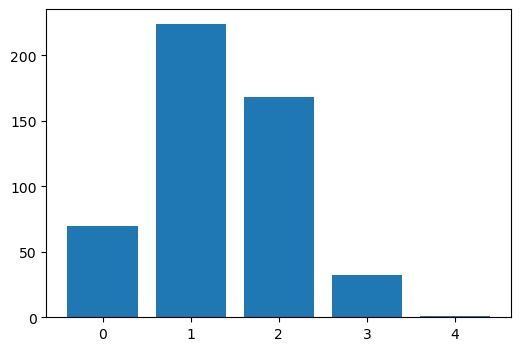

In [91]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6,4))

# Bar chart.
ax.bar(counts[0], counts[1]);

Based on the chart above, if the lady were choosing randomly from the 495 possible combinations, the most likely outcome is that she would correctly identify 1 out of the 4 milk-first cups.

***
### Hypothesis and Evidence

**Null Hypothesis (H₀):**
- The lady cannot distinguish between tea-first and milk-first cups; 
- Any correct identification is due to random chance.

**Alternative Hypothesis (H₁):**
- The lady can correctly identify which cups had tea or milk poured first at a rate higher than would occur by random chance.

**Evidence / Probability under H₀:**
- There are 495 ways to choose 4 milk-first cups out of 12.
- Probability of correctly identifying all 4 milk-first cups by chance is 1/495 ≈ 0.00202

#### Calculations 

In [92]:
# The probability of randomly selecting the four correct cups.
1/495

0.00202020202020202

### Comparing the experiments.


| Experiment | Total Cups | Milk-First Cups | H₀                              | H₁                               | Probability - All Correct by Chance |
| ---------- | ---------- | --------------- | --------------------------------| -------------------------------- | ------------------------------------|
| Original   | 8          | 4               | No distinguish tea or milk first| Lady can distinguish tea vs milk | 1 / 70 ≈ 0.0143                     |
| Extended   | 12         | 4               | No distinguish tea or milk first| Lady can distinguish tea vs milk | 1 / 495 ≈ 0.00202                   |

From the table we can see that as the number of cups increases, the probability of randomly guessing all correctly becomes much smaller.

###  Discussion — Should we keep or slightly tighten the p-value threshold?

In the extended version of the experiment (12 cups: 8 tea-first and 4 milk-first), the chance of randomly getting all 4 milk-first cups correct is:

$ p = \frac{1}{\text{number of combinations}} = \frac{1}{495} \approx 0.002 $

This is much smaller than in the original 8-cup experiment: 

$ p = \frac{1}{70} \approx 0.014 $

As a result in the extended version of the experiment a perfect score (all correct) is about _seven times less likely_ to happen by chance.
That means a perfect result provides _stronger evidence_ against the null hypothesis.
Because of that, the usual significance level of _α = 0.05_ is already conservative — there’s no reason to relax it.

However, the test also becomes harder.

On the other hand, If someone correctly identifies **3 out of 4** milk-first cups, the probability of that happening by chance is:

$ p = \frac{\text{number of 3-overlap combinations}}{495} = \frac{33}{495} \approx 0.067 $

This value (0.067) is slightly above 0.05, meaning it wouldn’t be considered statistically significant at the standard level.

If we want to detect _partial ability_ (someone who’s better than chance but not perfect), we could:

- Keep 'α = 0.05' but change the rule (eg. consider ≥3 correct as evidence), or
- Repeat the experiment multiple times and test the total number of correct guesses.

### End of Problem 1
***

***

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.


***
_Libraries used in Problem 2:_

- numpy (imported as np) – Supports numerical computations and array operations [Official documentation](https://numpy.org/doc/stable/)
- random – Used for generating random values [Official documentation](https://docs.python.org/3/library/random.html)
- matplotlib.pyplot (imported as plt) – Used for creating visualizations and plots [Official documentation](https://matplotlib.org/stable/api/pyplot_summary.html)
- scipy.stats - Offers statistical functions and probability distributions [Official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)
- seaborn (imported as sns) – High-level library for statistical data visualization built on Matplotlib [Official documentation](https://seaborn.pydata.org/)

***

### Solution of Problem 2.

In the above problem, we want to understand the difference between two ways of calculating standard deviation: 
- Calculation 1 - for a full population (`ddof=0`).
- Calculation 2 - for a sample (`ddof=1`). 

To explore this, we are taking 100,000 samples from a standard normal distribution, each containing 10 random values. For every sample, we calculate both versions of the standard deviation. This gives us two large collections of SD values that we can compare.

#### Normal Distribution, Population SD & Sample SD.

Standard deviation measures the spread of a data distribution. It measures the typical distance between each data point and the mean[Khan Academy](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review).

There are two ways of calculating standard deviation:
1. If data is considered a population on its own the formula is:

$$
\sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}}
$$


2. If data is considered a sample from a larger population the formula is:

$$
s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}}
$$

Where:
- $\bar{x}$ is the sample mean, an estimate of the population mean $\mu$.
- Because the sample mean is calculated from the data itself, it underestimates the true variability slightly.
- To correct for this bias, we divide by $n - 1$ instead of $n$. This is called 'Bessel's correction'.
- Essentially, using $\bar{x}$ “costs” us one degree of freedom, hence $n - 1$.


As we can see there is one change in calculation of sample SD, we divide by one less that in the population SD calculation.

**Generating 100,000 random samples each containing 10 random (size = 10)**

- For this problem I'm setting a seed to ensure the results are reproducible. This will get the same dataset and same histogram every time the code is run.

In [94]:
np.random.seed(42)      # Ensuring reproducibility
n_samples = 100000      # Number of repeated samples
size_sample = 10        # Size of each sample

# Each row is one sample of 10 values from N(0, 1)
data = np.random.normal(size=(n_samples, size_sample))
data

array([[ 0.49671415, -0.1382643 ,  0.64768854, ...,  0.76743473,
        -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, ...,  0.31424733,
        -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , ...,  0.37569802,
        -0.60063869, -0.29169375],
       ...,
       [ 0.31458125,  0.65166587, -1.25387777, ..., -0.48088524,
        -1.24045614, -1.1018737 ],
       [ 0.43707625, -0.71674778, -0.55323958, ...,  1.33532838,
        -0.45809456,  1.38587381],
       [ 0.05074307,  2.14663503,  1.61220403, ..., -0.11297975,
         1.46914237,  0.47643025]])

**Computing Standard Deviations for each sample**

In [95]:
# ddof = 1 - sample SD (unbiased estimator)
sd_sample = data.std(axis=1, ddof=1)
print(f"Sample SD: {sd_sample}")
# ddof = 0 - population SD formula (biased for samples)
sd_population = data.std(axis=1, ddof=0)
print(f"Population SD: {sd_population}")

Sample SD: [0.72300833 0.75532475 0.8138978  ... 0.77917664 0.75455478 0.78622916]
Population SD: [0.68590593 0.71656397 0.77213125 ... 0.73919187 0.71583352 0.74588247]


**Plotting the Histograms**

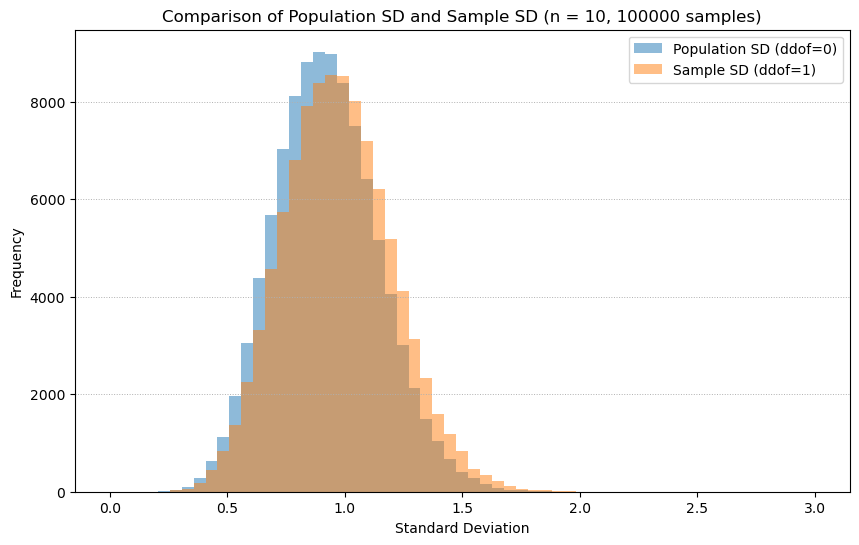

In [96]:
# Define bins with explicit range using np.linspace
bins_linspace = np.linspace(0, 3, 60)  # SDs are positive, max ~3

plt.figure(figsize=(10,6))  # Figure size.

# Plotting histogram of population SD (ddof=0) with transparency.
plt.hist(sd_population, bins=bins_linspace, alpha=0.5, label="Population SD (ddof=0)")

# Plotting histogram of sample SD (ddof=1) with transparency.
plt.hist(sd_sample, bins=bins_linspace, alpha=0.5, label="Sample SD (ddof=1)")

plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.title("Comparison of Population SD and Sample SD (n = 10, 100000 samples)")
plt.legend()
plt.grid(axis="y", linestyle=":", linewidth=0.7)

plt.show()

**Differences between Population SD and Sample SD**

In [97]:
# Printing mean SDs for quantitative comparison.
mean_pop = np.mean(sd_population)
mean_sample = np.mean(sd_sample)
print(f"Mean population SD: {mean_pop:.4f}")
print(f"Mean sample SD: {mean_sample:.4f}")
print(f"Difference (sample - population SD): {mean_sample - mean_pop:.4f}")

Mean population SD: 0.9228
Mean sample SD: 0.9727
Difference (sample - population SD): 0.0499


**Conclusion**

- The mean sample SD (0.973) is slightly higher than the mean population SD (0.923) due to Bessel’s correction, which inflates the SD to provide an unbiased estimate. 
- This difference (~0.05) is most noticeable for small sample sizes because the sample standard deviation divides by `𝑛 − 1` rather than `𝑛` slightly inflating the estimate.
- As the sample size increases, this correction becomes less significant, and we expect the sample standard deviation to converge toward the population standard deviation

### End of Problem 2
***

***

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d = 0, 0.1, 0.2, ..., 1.0, repeat the following simulation 1,000 times: 

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.

2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.

3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

***
_Libraries used in Problem 3:_

- numpy (imported as np) – Supports numerical computations and array operations [Official documentation](https://numpy.org/doc/stable/)
- random – Used for generating random values [Official documentation](https://docs.python.org/3/library/random.html)
- matplotlib.pyplot (imported as plt) – Used for creating visualizations and plots [Official documentation](https://matplotlib.org/stable/api/pyplot_summary.html)
- scipy.stats - Offers statistical functions and probability distributions [Official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)
    - norm - Provides functions for the normal (Gaussian) distribution, like PDF, CDF etc...
- seaborn (imported as sns) – High-level library for statistical data visualization built on Matplotlib [Official documentation](https://seaborn.pydata.org/)

***

### Solution of Problem 3

Given:

- Mean differences: 𝑑 = 0, 0.1, 0.2,..., 1.0
    - For each 𝑑, a simulation will be performed.
- Sample size per group: 𝑛 = 100
- Number of simulations per 𝑑: 1,000.
- Group A: standard normal distribution 𝑁(0, 1)
- Group B: normal distribution with mean 𝑑 and standard deviation 1, 𝑁(𝑑, 1)
- Significance level: 𝛼 = 0.05.
- For each simulation, an independent samples *t*-test is conducted to compare the means of the two groups. The hypotheses for the test are:

$$
H_0: \mu_A = \mu_B 
\quad \text{vs} \quad 
H_1: \mu_A \neq \mu_B
$$

The null hypothesis is rejected whenever the resulting *p*-value is less than 0.05. For each value of \( 𝑑 \), the proportion of simulations in which the null hypothesis is _not rejected_ is recorded. This proportion represents the estimated _Type II error rate_ for that mean difference.

**Step 1**
- Draw random samples from the normal distribution using `scipy.stats.norm`.
- For each mean difference 𝑑, repeat the sampling 1,000 times and store the results.

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Sample size for each group
n = 100

# Number of simulations
n_simulations = 1000

# Mean differences: d = 0, 0.1, ..., 1.0
d_values = np.arange(0, 1.01, 0.1)

# Dictionary to store generated samples
# Each key d contains a list of (group_a, group_b) pairs
samples = {}

# Loop over each mean difference
for d in d_values:
    
    # List to store samples for this value of d
    samples_d = []
    
    # Repeat sampling 1,000 times
    for _ in range(n_simulations):
        
        # Generate sample from standard normal distribution N(0,1)
        group_a = norm.rvs(loc=0, scale=1, size=n)
        
        # Generate sample from normal distribution N(d,1)
        group_b = norm.rvs(loc=d, scale=1, size=n)
        
        # Store the two groups together
        samples_d.append((group_a, group_b))
    
    # Store all samples for this value of d
    samples[d] = samples_d

group_a, group_b


(array([-0.6016185 , -0.95403969, -1.05574666,  0.01503686, -0.24001449,
         0.10028473,  0.36804574, -0.16808406, -0.43340992, -0.23972774,
         1.0065648 , -0.00537196,  0.78240668,  0.3926859 , -0.64292778,
         0.53733203, -0.84919119, -0.69851709,  0.76231878, -1.14043578,
         0.46789507, -0.88830983,  2.31175011,  0.9680905 ,  0.3722866 ,
         1.17952319,  0.52209214,  0.76179287,  1.22743412,  0.60408651,
         1.25576487,  0.63795325, -0.77606983, -1.18144812, -0.368277  ,
        -1.29927118, -1.38719999, -1.38122674,  0.37654919,  0.32414289,
         0.52048111,  0.51298915,  0.32411901,  1.23336795,  0.18476056,
        -0.62704477, -2.44239145, -0.81668423,  0.98262803, -0.76737898,
         0.00509075, -1.97440456,  1.05650665, -1.25942974, -0.58708155,
         0.77531273,  1.16943212,  0.51496314, -0.37051199, -0.25786301,
        -0.47042844, -2.09347837,  2.01439515, -1.18372592, -0.64416145,
        -0.21785387,  0.99182053, -0.33406819,  0.6

**Visually representing the samples**

To get a better sense of the two groups, I decided to create a few different plots:  
- *Histogram:* This lets me see the overall distribution of values in each group.  
- *Strip Plot:* I can see all the individual data points, which helps me notice overlap and spread.  
- *Box Plot:* This gives me a quick summary of each group’s distribution, showing the median, quartiles, and any outliers.

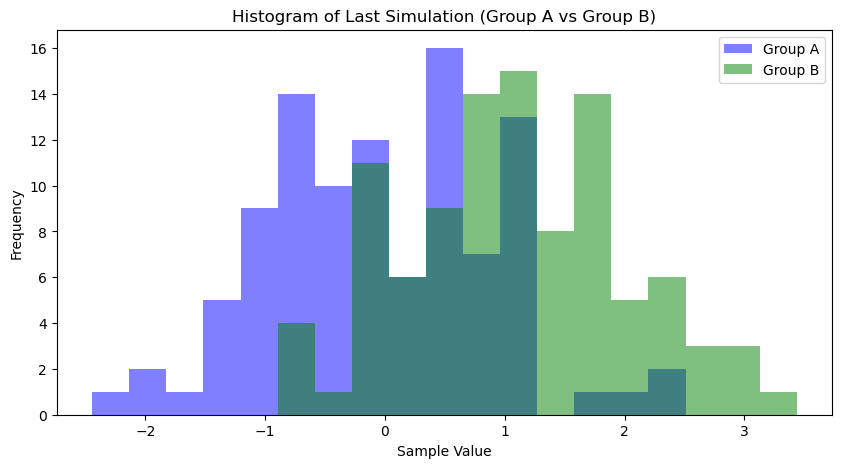

In [99]:
# Creating a histogram.
fig, ax = plt.subplots(figsize=(10, 5))

# Define bins that cover both groups
all_data = np.concatenate([group_a, group_b])
bins = np.linspace(all_data.min(), all_data.max(), 20)  # 20 bins

# Plot histograms
ax.hist(group_a, bins=bins, color='blue', alpha=0.5, label='Group A')
ax.hist(group_b, bins=bins, color='green', alpha=0.5, label='Group B')

# Add labels, title, and legend
ax.set_xlabel('Sample Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Last Simulation (Group A vs Group B)')
ax.legend()

# Show the plot
plt.show()

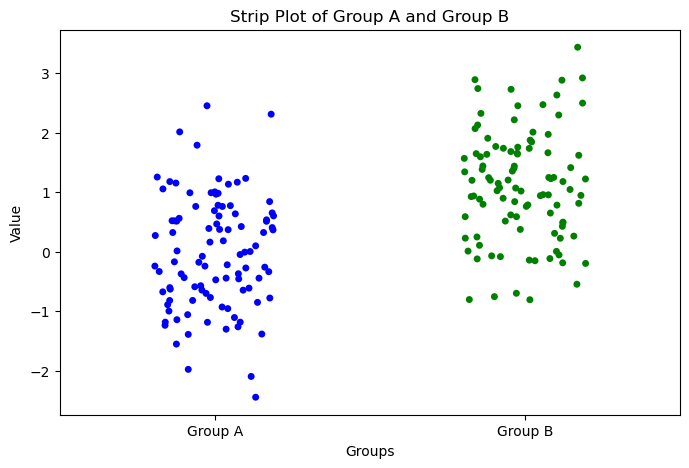

In [100]:
# Strip Plot.

# Making sure they are NumPy arrays
group_a = np.array(group_a)
group_b = np.array(group_b)

# Combine values
values = np.concatenate([group_a, group_b])

# Numeric x positions: 0 for group_a, 1 for group_b
x_positions = np.array([0]*len(group_a) + [1]*len(group_b))

# Create a categorical hue array
hue_labels = ['Group A'] * len(group_a) + ['Group B'] * len(group_b)

# Create figure
plt.figure(figsize=(8, 5))

# Strip plot with hue (avoids FutureWarning)
sns.stripplot(x=x_positions, y=values, hue=hue_labels, dodge=False,
              jitter=0.2, palette=['blue', 'green'], legend=False)

# Set x-axis ticks and labels
plt.xticks([0, 1], ['Group A', 'Group B'])

# Add labels and title
plt.xlabel('Groups')
plt.ylabel('Value')
plt.title('Strip Plot of Group A and Group B')

plt.show()

<Axes: >

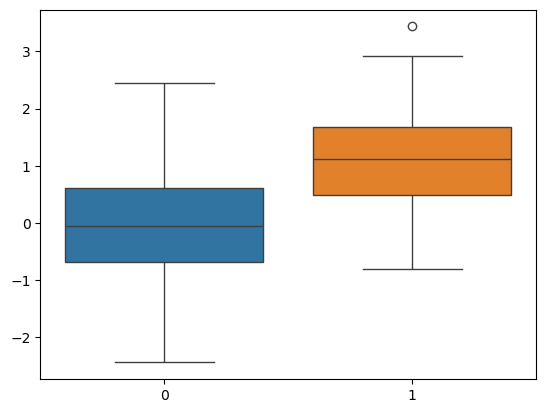

In [101]:
# Box plots.
sns.boxplot(data=[group_a, group_b])

**What these three graphs show**

As we can see from all the graphs:

- Group A is mostly centered around 0, as expected for N(0, 1).
- Group B is shifted to the right, centered around 1, showing the effect of the mean difference.
- There is an overlap between two groups, mostly between -1 and 2.
- The variance (spread of values) looks similar for both groups, which is as a result of both group having standard deviation 1.

**Conclusion from the Histogram:** 
- Group B has a higher mean than the Group A.
- The overlapping region suggests that a t-test may fail to detect a statistically significant difference in some simulations, since the distributions are not fully separated.

**Step 2: Independent Samples t-Test**

Null Hypothesis: the population means are equal.

In [102]:
# Perform a t-test.
stats.ttest_ind(group_a, group_b)

TtestResult(statistic=-8.627383822966607, pvalue=2.0349339076619435e-15, df=198.0)

**Null Hypothesis Results**

What we are more interested in for this test is the *p-value*.

- `p-value = 2.03 × 10⁻¹⁵` means that  
    - the value is approximately _0.00000000000000203_.  
    - this value is far smaller than _0.05_.

Which means:  
If we take all samples of size 100 from these two populations and their means were equal, then the probability of obtaining a *t*-statistic this extreme or more extreme is  `2.03 × 10⁻¹⁵`.

**Conclusion:**  
We reject the *null hypothesis* and conclude that there is a *statistically significant difference between the population means*.


**The Other Two Values**

- `t-statistic = -8.63`  
    - This value tells us that the two sample means are *8.63 standard errors apart*.  
    - The negative sign indicates that the first group’s mean (`group_a`) is *lower* than the second group’s mean (`group_b`).

- `df = 198`  
    - `df` means *degrees of freedom*.  
    - A value of 198 indicates a *large sample size*.  
    - The degrees of freedom are calculated as the sum of the two sample sizes minus two:  
      \[
      100 + 100 - 2 = 198.
      \]


**Significance Levels & Null Hypothesis**

Another way to evaluate the null hypothesis is by visualizing the test statistic’s distribution and the significance-based rejection regions. This shows how significance levels determine whether the null hypothesis is rejected and helps explain changes in the Type II error rate as the mean difference varies.

Critical t-values: -1.972, 1.972


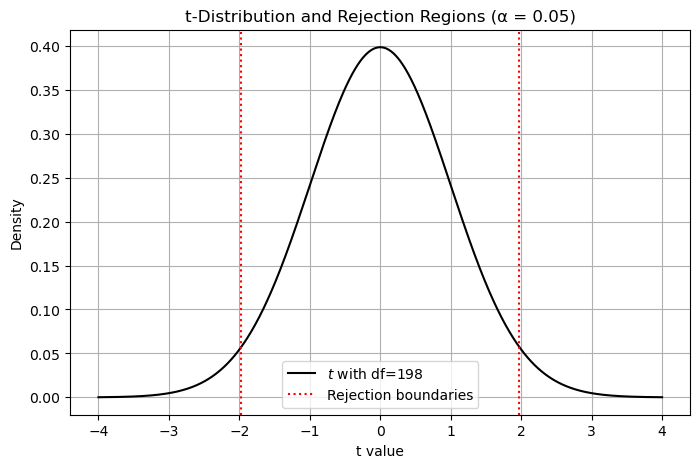

In [103]:
# Degrees of freedom for independent t-test (100 + 100 - 2 = 198)
df = 198
alpha = 0.05

# Critical t-values for two-sided test
t_lower = stats.t.ppf(alpha/2, df)
t_upper = stats.t.ppf(1 - alpha/2, df)
print(f"Critical t-values: {t_lower:.3f}, {t_upper:.3f}")

# Plotting the t-distribution under H0
fig, ax = plt.subplots(figsize=(8, 5))

# X values
x = np.linspace(-4, 4, 1000)

# t distribution
ax.plot(x, stats.t.pdf(x, df=df), 'k', label=f'$t$ with df={df}')

# Rejection region cutoffs
ax.axvline(t_lower, color='r', linestyle=':', label='Rejection boundaries')
ax.axvline(t_upper, color='r', linestyle=':')

# Labels and legend
ax.set_xlabel('t value')
ax.set_ylabel('Density')
ax.set_title('t-Distribution and Rejection Regions (α = 0.05)')
ax.legend()
plt.grid(True)
plt.show()

The t-distribution plot with `𝑑𝑓 = 198` illustrates how the test statistic is evaluated under the null hypothesis:

- The red vertical lines mark the critical t-values around −2.0 and +2.0, which define the rejection regions for a significance level `𝛼 = 0.05`.
- Our observed t-statistic of −8.63 lies far outside these rejection boundaries, confirming that the test result is statistically significant.
- This visualization helps explain why we reject the null hypothesis: the probability of obtaining a t-statistic this extreme by chance alone is almost zero, falling well within the rejection region.

**Conclusion (again): We reject the _null hypothesis_**

**Step 3: Record the proportion of times the null hypothesis is not rejected.**

First, I set the significance level at 0.05. For each mean difference in d_values, I perform multiple simulated independent t-tests between the sample groups and count how often the null hypothesis is not rejected (p-value ≥ 0.05). I then calculate and store the proportion of simulations where H0 is not rejected for each mean difference, which helps visualize how the probability of failing to reject H0 changes as the mean difference increases.

In [104]:
# Significance level for the hypothesis.
alpha = 0.05  
# Initializing a list to store proportions of times H0 is not rejected for each mean difference.
not_rejected_prop = []  
# Loop over each mean difference value (e.g., 0, 0.1, ..., 1.0) 
for d in d_values:  
    not_rejected = 0  # Counter for how many times the null hypothesis is not rejected at this d.
    
    # For each pair of samples (group_a, group_b) generated for this mean difference d:
    for group_a, group_b in samples[d]:
        # Perform an independent samples t-test, I'm interested here for just p-value.
        p_value = stats.ttest_ind(group_a, group_b).pvalue
        
        # Check if the p-value is greater than or equal to the significance level
        # This means we fail to reject the null hypothesis in this simulation
        if p_value >= alpha:
            not_rejected += 1  # Increment the counter for non-rejections
    
    # Calculate the proportion of simulations where H0 was not rejected for this d
    proportion_not_rejected = not_rejected / n_simulations
    
    # Store this proportion in the list
    not_rejected_prop.append(proportion_not_rejected)

*Plotting the graph*

This graph shows the results obtained from the simulations in the code above, plotting the proportion of times H₀ was not rejected against the mean difference d.

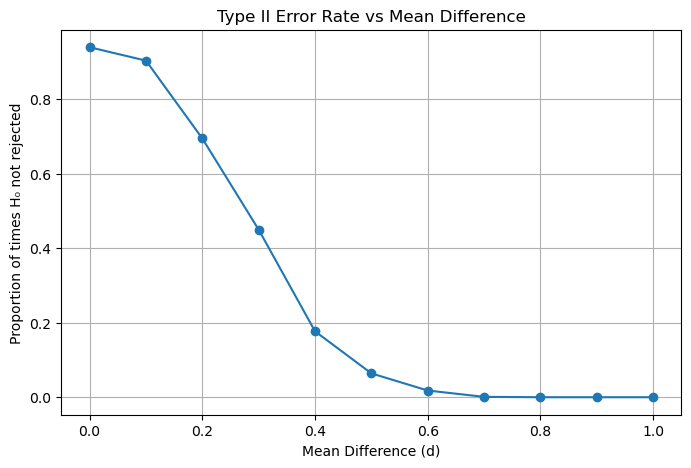

In [105]:
plt.figure(figsize=(8, 5))
plt.plot(d_values, not_rejected_prop, marker='o')
plt.xlabel("Mean Difference (d)")
plt.ylabel("Proportion of times H₀ not rejected")
plt.title("Type II Error Rate vs Mean Difference")
plt.grid(True)
plt.show()

**Conclusion:**

- The graph shows how the proportion of times the null hypothesis (H₀) is not rejected—i.e., the Type II error rate—varies with the mean difference (d). When the mean difference is zero or very small, this proportion is close to 1, indicating the test often fails to detect a difference.
- As the mean difference increases, the Type II error rate decreases sharply, approaching zero around a mean difference of 0.7 or higher. This means the test becomes more effective at detecting true differences as they grow larger.

### End of Problem 3
***

***

## Problem 4: ANOVA

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.
1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

***
_Libraries and some functions used in Problem 4:_

- pandas (as pd) - Creating and working with DataFrames [Official documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
- scipy.stats - Offers statistical functions and probability distributions [Official documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)
- stats.f_oneway() function - Perform one-way ANOVA to test for differences between multiple groups [Official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
- stats.tukey_hsd() function - Perform Tukey's Honest Significant Difference(HSD) post-hoc test [Official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html)
- stats.ttest_ind() function - Perform independent two-sample t-tests between pairs of groups [Official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
***

### Solution of Problem 4

Given:

* Three independent samples are to be generated.
* Each sample has a size of 30 observations.
* The samples are drawn from normal (Gaussian) distributions.
* Sample 1:
  * Mean 𝜇 = 0 and Standard deviation 𝜎 = 1
* Sample 2:
  * Mean 𝜇 = 0.5 and Standard deviation 𝜎 = 1
* Sample 3:
  * Mean 𝜇 = 1 and Standard deviation 𝜎 = 1

**Part 1**

Perform a one-way ANOVA to test whether all three means are equal.

ANOVA stands for Analysis of Variance, a statistical test used to compare the means of three or more groups. It helps decide whether the differences seen in the data are due to real group differences or just random chance. [ANOVA Test: An In-Depth Guide with Examples](https://www.datacamp.com/tutorial/anova-test?dc_referrer=https%3A%2F%2Fwww.google.com%2F)

There are three main types of ANOVA:

* One-way ANOVA – compares the means of three or more groups using one independent factor.
* Two-way ANOVA – compares group means using two independent factors and can also test for interaction between them.
* Repeated Measures ANOVA – compares means when the same subjects are measured more than once under different conditions.

For this problem, we are interested in performing a one-way ANOVA to test whether the means of the three groups are equal.

_Generating three independent samples._

_Note:_ I am setting a seed so that the “random” data is the same each time I run the code, making it easier to reproduce and keep the results consistent.

In [106]:
np.random.seed(42)
# Generating the groups.
group_1 = np.random.normal(0,   1, 30)
group_2 = np.random.normal(0.5, 1, 30)
group_3 = np.random.normal(1,   1, 30)

_Creating a pandas DataFrame._

In [107]:
df = pd.DataFrame({'Group 1':group_1, 'Group 2':group_2, 'Group 3':group_3})

df

,Group 1,Group 2,Group 3
0,0.496714,-0.101707,0.520826
1,-0.138264,2.352278,0.814341
2,0.647689,0.486503,-0.106335
3,1.523030,-0.557711,-0.196207
4,-0.234153,1.322545,1.812526
5,-0.234137,-0.720844,2.356240
6,1.579213,0.708864,0.927990
7,0.767435,-1.459670,2.003533
8,-0.469474,-0.828186,1.361636
9,0.542560,0.696861,0.354880


In [ ]:
# Generating summary statistics about each group.
df.describe()

,Group 1,Group 2,Group 3
count,30.000000,30.000000,30.000000
mean,-0.188147,0.378838,1.012885
std,0.900006,0.931102,0.991983
min,-1.913280,-1.459670,-1.619745
25%,-0.591051,-0.209114,0.485858
50%,-0.234145,0.435427,1.025611
75%,0.360335,1.044662,1.737711
max,1.579213,2.352278,2.564644


_Perform ANOVA and returning the test results._

we're returning two values:
- F-statistic: measuring how different the group means are relative to the variation withing the groups.
- p-value: tells us whether the difference between the means are statistically significant.

In [109]:
# Perform ANOVA.
f_statistics, p_value = stats.f_oneway(df['Group 1'], df['Group 2'], df['Group 3'])
# Show values.
f_statistics, p_value

(12.209525517972807, 2.120074814050707e-05)

**Interpretation of ANOVA test results.**

To determine whether the differences between the means are statistically significant, we compare the p-value to our significance to access the null hypothesis.[Interpret the key results for One-Way ANOVA](https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/anova/how-to/one-way-anova/interpret-the-results/key-results/)
The null hypothesis assumes that all the population means are equal. A common significance level is 0.05, which means there is a 5% chance of wrongly concluding that a difference exists when, in fact, there is none.

If p-value ≤ α: The differences between some of the means are statistically significant.

From our test the p-value result shows:
- p-value: 2.120074814050707e-05 = 0.0000212
- p-value is much smaller than 0.05.
- this indicates strong evidence against the null hypothesis that all group means are equal.

**Conclusion based on ANOVA test results:**

We reject the null hypothesis and conclude that at least one group mean is significantly different from the others.

**Tukey's HSD (Honestly Significance Difference**

ANOVA tells us whether there is a significant difference between group means, but it does not indicate which groups are different. To identify exactly where the differences occur, we use Tukey’s HSD test, a post hoc method that performs pairwise comparisons between all group means. While ANOVA evaluates whether the true means of all samples are equal, Tukey’s HSD compares each group mean to every other group mean, helping us pinpoint which specific groups differ significantly.

In [110]:
# Tukey's HSD.
result = stats.tukey_hsd(df['Group 1'], df['Group 2'], df['Group 3'])
print(result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.567     0.057    -1.147     0.013
 (0 - 2)     -1.201     0.000    -1.781    -0.621
 (1 - 0)      0.567     0.057    -0.013     1.147
 (1 - 2)     -0.634     0.029    -1.214    -0.054
 (2 - 0)      1.201     0.000     0.621     1.781
 (2 - 1)      0.634     0.029     0.054     1.214



**Tukey's HSD Results:**

_Comparison of p-values:_

- Group 1 vs Group 2 ((0 - 1) values):  
    - p-value: 0.057. The difference between the groups is not statistically significant at the 5% level.
- Group 1 vs Group 3 ((0 - 2) values):
    - p-value: 0.000. The difference between the groups is statistically significant.
- Group 2 vs Group 3 ((1 - 2) values):
    - p-value: 0.029. The difference between the groups is statistically significant.

**Conclusion of Tukey's HSD test results:**

- Group 3 differs significantly from both Group 1 and Group 2.
- Group 1 and Group 2 do not differ significantly from each other.

#### Part 2 - Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.

In [ ]:
#Defining a function to perform the two-sample tests.
def three_ttest(group1, group2, group3, alpha=0.05):
    # Perform independent t-tests
    _, p_value_12 = stats.ttest_ind(group1, group2)
    _, p_value_13 = stats.ttest_ind(group1, group3)
    _, p_value_23 = stats.ttest_ind(group2, group3)
    
    # Prepare results dictionary
    results = {
        "Group 1 vs Group 2": p_value_12,
        "Group 1 vs Group 3": p_value_13,
        "Group 2 vs Group 3": p_value_23
    }
    
     # Check significance and print
    for comparison, p in results.items():
        if p < alpha:
            print(f"{comparison}: p = {p:.5f} → Significant difference")
        else:
            print(f"{comparison}: p = {p:.5f} → Not significant")
    
    return results

In [ ]:
# Calling the above function to get p-values for our groups.
p_values = three_ttest(df['Group 1'], df['Group 2'], df['Group 3'])
print(p_values)

Group 1 vs Group 2: p = 0.01972 → Significant difference
Group 1 vs Group 3: p = 0.00001 → Significant difference
Group 2 vs Group 3: p = 0.01335 → Significant difference
{'Group 1 vs Group 2': 0.019717941865758048, 'Group 1 vs Group 3': 7.737964508099687e-06, 'Group 2 vs Group 3': 0.013347246886682384}


**Results of three two-sample t-test:**
- Group 1 vs Group 2:
    - p-value: 0.0197 -> less than 0.05.
    - The difference is statistically significant.
- Group 1 vs Group 3:
    - p-value: 0.00001 -> much smaller than 0.05.
    - The difference is statistically significant.
- Group 2 vs Group 3:
    - p-value: 0.0133 -> less than 0.05.
    - The difference is statistically significant.

**Conclusion:**
All three pairwise comparisons show significant differences between the groups.


**Part 3 - Compare the conclusions.**

ANOVA Result:

- p-value: 0.0000212.
- Because of p-value much smaller that 0.05, at least one group mean differs from the others. 
- We reject the _null hypothesis_ that all group means are equal.

Two-Sample t-Test Results:

- Group 1 vs Group 2: p = 0.01972.
- Group 1 vs Group 3: p = 0.00001.
- Group 2 vs Group 3: p = 0.01335.
- Each pairwise t-test shows a significant difference between the groups. 
- The test tells us exactly which group means differ from each other.
- We reject the _null hypothesis_ for all two-sample comparisons.


Differences between Two-Sample t-Tests and ANOVA:

1. Scope:
    * ANOVA looks at all three groups at once.
    * Two-Sample t-Tests compare two groups at a time.
2. P-values:
    * ANOVA produces a single p-value for the overall test.
    * Two-Sample t-tests produce separate p-values for each comparison.
3. Consistency:
    * Both methods agree that there are significant differences between the groups.
    * The t-tests provide more detailed information, showing specifically which groups differ.


**Why ANOVA is preferred over running several t-tests?**

ANOVA is generally preferred over multiple two-sample t-tests when comparing more than two groups. While a t-test can only compare two groups at a time, performing multiple t-tests increases the risk of Type I errors (false positives). ANOVA allows us to compare three or more group means simultaneously, taking into account both between-group and within-group variation. This approach controls the overall error rate and provides a single, reliable test for differences among all groups. 

### End of Problem 4
***

## _End_